 # Kendrick Mass Filter - Composition Analysis 
 __Authors:__ Ricardo R. da Silva (ridasilva@ucsd.edu), Madeleine Ernst (mernst@ucsd.edu), Alan K. Jarmusch (ajarmusch@ucsd.edu) <br>
 __Verion:__ 1.0 (Prior to Submission of Manuscript) <br>
 __Date of Last Revision:__ 06-21-2018 <br>

**Description**: Kendrick mass is the mass-to-charge (*m/z*) of each ion rescaled to an integer value of a given unit repeat. The defect between the Kendrick scaled *m/z* and the integer Kendrick mass value, i.e. Kendrick mass defect (KMD), is similar between homologous compounds. The Kendrick Mass Filter (MDF) is used to perform selection and removal of data centered around a user-defined KMD, with addtional restrictions on the elution time and presence of possibly multiple homologous compounds eluting together. This notebook illustrates how the Kendrick Mass Filter can be applied to understand the chemical composition of a sample.

**Input**: <br>
<ul>
<li>**Feature table** (.csv) is a comma separated file with features in columns and samples in rows. Feature IDs are provided in the column names in the following format: "mz;RT". The first column must contain sample names. </li>
</ul> <br>
**Output**: <ul>
<li>**Summary tables** (.csv) files containing Kendrick mass filtered composition data.  </li>
<li>**Plots**: (.pdf) files visualizing sample composition. </li>
</ul> <br> 
**Dependencies**: R version 3.4.2 (2017-09-28) and packages: Hmisc_4.0-3, ggplot2_2.2.1, Formula_1.2-2, survival_2.41-3, lattice_0.20-35, Rgraphviz_2.22.0, graph_1.56.0, BiocGenerics_0.24.0.

load libraries

In [1]:
library(Rgraphviz)

Loading required package: graph
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Loading required package: grid


load Kendrick Mass Filter source function

In [2]:
source("kendrick.mass.filter_new_all_datamatrix_terminologyupdate.R")

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following object is masked from ‘package:BiocGenerics’:

    combine

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



specify input file

In [15]:
ft <- "all17K/tab17plasmaspikedswab.csv"

perform composition analysis through KMF

In [17]:
pollist <- composition.analysis(
    mass_defect_parameter = 0.01, 
    retention_time = 0.8, 
    connection_filter = TRUE, 
    connections_min_number = 5,
    polymer=c('alkane_other_CH2',
              'oxidation',
              'water_cluster',
              'alkane_C2H4',
              'methanol_cluster',
              'acetonitrile_cluster',
              'propylation_other_C3H6',
              'polyethylene_glycol_other_C2H4O1',
              'perfluoro_CF2',
              'ammoniumchloride_cluster',
              'butylation_other_C4H8',
              'sodiumchloride_cluster',
              'polypropylene_glycol_other_C3H6O1',
              'ammoniumformate_cluster',
              'potassiumchloride_cluster',
              'polysiloxane',
              'sodiumacetate_cluster'),
    feature_matrix = ft, sprint=TRUE)

[1] Summary
[1] Polymer Filtered -  alkane_other_CH2
[1] Parameter: mass defect -  0.01
[1] Parameter: retention time -  0.8
[1] Parameter: node degree (minimum # of connection) -  5
[1] number of MS1 features before filtering -  1191
[1] number of MS1 features after filtering (before reincluding based on minimum # of connections) -  991
[1] number of MS features after filtering (with reincluded based on minimum # of connections) -  1124
[1] Summary
[1] Polymer Filtered -  oxidation
[1] Parameter: mass defect -  0.01
[1] Parameter: retention time -  0.8
[1] Parameter: node degree (minimum # of connection) -  5
[1] number of MS1 features before filtering -  1191
[1] number of MS1 features after filtering (before reincluding based on minimum # of connections) -  775
[1] number of MS features after filtering (with reincluded based on minimum # of connections) -  1069
[1] Summary
[1] Polymer Filtered -  water_cluster
[1] Parameter: mass defect -  0.01
[1] Parameter: retention time -  0.8
[

Example of how one can access the polymer by name

In [18]:
pollist$data$polyethylene_glycol_other_C2H4O1

[1]   16   17   20   21   24   27   29   31   33   35   56   65  106  132  147
 [16]  154  222  223  224  225  226  227  228  229  230  231  232  233  234  235
 [31]  236  239  243  244  251  252  256  264  270  306  307  319  370  371  379
 [46]  406  416  435  438  439  440  441  442  443  444  445  446  447  450  453
 [61]  454  455  457  458  459  460  461  463  464  466  467  468  471  473  474
 [76]  477  479  480  481  482  483  484  486  487  489  491  493  495  496  497
 [91]  500  501  505  506  507  508  509  510  511  512  523  529  533  534  535
[106]  536  537  540  541  543  546  547  548  550  551  552  553  554  555  557
[121]  558  559  562  563  568  572  575  576  577  579  582  594  597  598  602
[136]  610  612  621  622  623  627  631  632  635  636  637  638  653  663  679
[151]  680  691  696  701  708  754  756  759  761  771  775  778  780  783  786
[166]  788  794  795  797  802  831  854  861  869  877  897  898  913  922  949
[181]  967  984 1064 1106  879  322  246  253  277  287  286  308 1003 1028  451
[196]  452  449  448  492  470  465  476  521  499 1049  867  583  599 1047  970
[211]  694  589 1150  585 1048  620  604  674  644  592  618  731  809  734 1058
[226]  772  657  762 1114  723  668  834 1056  862  938 1053  947  841 1077  917
[241]  992 1152  956  905 1110  983 1125 1176  996 1042 1112

Create a table with all polymers

In [19]:
poltab <- do.call(rbind, pollist$summary)
head(poltab)

,p,mass_defect_parameter,retention_time,connections_min_number,features_before_filtering,features_after_filtering,features_after_filtering_wgraph
alkane_other_CH2,alkane_other_CH2,0.01,0.8,5,1191,991,1124
oxidation,oxidation,0.01,0.8,5,1191,775,1069
water_cluster,water_cluster,0.01,0.8,5,1191,992,1138
alkane_C2H4,alkane_C2H4,0.01,0.8,5,1191,618,915
methanol_cluster,methanol_cluster,0.01,0.8,5,1191,1113,1175
acetonitrile_cluster,acetonitrile_cluster,0.01,0.8,5,1191,1092,1170


In [20]:
poltab2 <- poltab[,c('p', 'features_before_filtering', 'features_after_filtering', 'features_after_filtering_wgraph')]
poltab2$N_filtered <-  poltab[,'features_before_filtering']- poltab[,'features_after_filtering']
poltab2$N_filtered_wg <-  poltab[,'features_before_filtering']- poltab[,'features_after_filtering_wgraph']
head(poltab2)

,p,features_before_filtering,features_after_filtering,features_after_filtering_wgraph,N_filtered,N_filtered_wg
alkane_other_CH2,alkane_other_CH2,1191,991,1124,200,67
oxidation,oxidation,1191,775,1069,416,122
water_cluster,water_cluster,1191,992,1138,199,53
alkane_C2H4,alkane_C2H4,1191,618,915,573,276
methanol_cluster,methanol_cluster,1191,1113,1175,78,16
acetonitrile_cluster,acetonitrile_cluster,1191,1092,1170,99,21


In [21]:
poltab3 <- do.call(rbind, apply(poltab2, 1, function(x) data.frame(Names=as.character(x['p']), class=c('wog', 'wg'), 
                                         value=as.numeric(matrix(x[c('N_filtered', 'N_filtered_wg')], nrow=2)))
                         )
          )
head(poltab3)

,Names,class,value
alkane_other_CH2.1,alkane_other_CH2,wog,200
alkane_other_CH2.2,alkane_other_CH2,wg,67
oxidation.1,oxidation,wog,416
oxidation.2,oxidation,wg,122
water_cluster.1,water_cluster,wog,199
water_cluster.2,water_cluster,wg,53


In [22]:
poltab3

,Names,class,value
alkane_other_CH2.1,alkane_other_CH2,wog,200
alkane_other_CH2.2,alkane_other_CH2,wg,67
oxidation.1,oxidation,wog,416
oxidation.2,oxidation,wg,122
water_cluster.1,water_cluster,wog,199
water_cluster.2,water_cluster,wg,53
alkane_C2H4.1,alkane_C2H4,wog,573
alkane_C2H4.2,alkane_C2H4,wg,276
methanol_cluster.1,methanol_cluster,wog,78
methanol_cluster.2,methanol_cluster,wg,16


In [23]:
characteristic <- c(
    "composition",
    "composition",
    "composition",
    "composition",
    "source",
    "source",
    "composition",
    "composition",
    "source",
    "source",
    "source",
    "source",
    "composition",
    "composition",
    "containment",
    "containment",
    "containment",
    "containment",
    "source",
    "source",
    "composition",
    "composition",
    "source",
    "source",
    "containment",
    "containment",
    "source",
    "source",
    "source",
    "source",
    "containment",
    "containment",
    "source",
    "source"
    )
poltab3 <- cbind(poltab3,characteristic)
head(poltab3)

,Names,class,value,characteristic
alkane_other_CH2.1,alkane_other_CH2,wog,200,composition
alkane_other_CH2.2,alkane_other_CH2,wg,67,composition
oxidation.1,oxidation,wog,416,composition
oxidation.2,oxidation,wg,122,composition
water_cluster.1,water_cluster,wog,199,source
water_cluster.2,water_cluster,wg,53,source


write output table with overall polymer composition to file

In [24]:
write.csv(poltab3,"20180611_Output_Table_CompositionAnalysis.csv", row.names=FALSE)

## Plot data

load file containing overall polymer compostion created above

In [25]:
poltab3 <- read.csv("20180611_Output_Table_CompositionAnalysis.csv", header=TRUE)

plot data
plot of overall composition that meet kendrick mass filtering criteria - not only wog is plotted 
(increased confidence should be given for repeat units when min_connections used)

Saving 10.5 x 10.5 in image


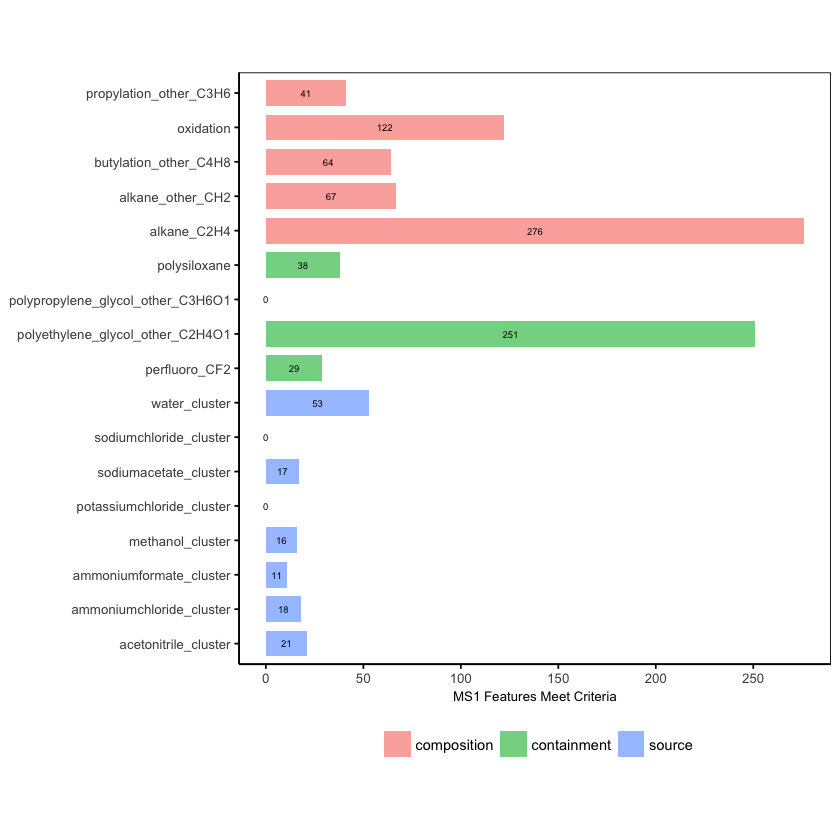

In [26]:
composition_plot <- ggplot(subset(poltab3,poltab3$class=="wg"),
                           aes(x=reorder(Names, -as.numeric(characteristic)), y=value))+
    geom_bar(aes(fill=characteristic), alpha =0.6, stat = "identity", width= 0.75, position="dodge")+
    scale_y_continuous(breaks=seq(0,500,50))+
    #facet_grid(~characteristic)+
    theme_minimal()+
            theme(
                panel.grid.major=element_line(colour ="grey95",size=0.5, linetype="blank"),
                panel.grid.minor=element_line(colour ="grey95",size=0.5, linetype="blank"),
                panel.border = element_rect(colour = "black", fill=NA, size=0.5),

                  axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                  axis.text=element_text(size=8),
                  axis.text.x=element_text(angle=0, hjust=0.5, vjust=0),
                  axis.line=element_line(colour="black",size=0.5, linetype="solid"),                  
                  axis.ticks.y=element_line(colour="black",size=0.5,linetype="solid"),
                  strip.text.y=element_text(size=8),
                  strip.text.x=element_text(size=8),
                  axis.title=element_text(size=8)) +
    theme(aspect.ratio=1)
composition_plot <- composition_plot + coord_fixed(ratio=1) + labs(x=NULL, y="MS1 Features Meet Criteria") +
    theme(legend.position="bottom", legend.title=element_blank()) + coord_flip() + 
    geom_text(aes(label=value),size=2, position = position_stack(0.5))

print(composition_plot)
ggsave("20180611_KMF_Figure_CompositionalPlot_17plasmaspikedswab.pdf",composition_plot, scale=1.5)